In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def ngon_distance(x,y,n):
    """
    Computes the distance between two points in regular n-gon.
    """
    x = x % n
    y = y % n
    if abs(x-y) < n/2:
        return abs(x-y)
    else:
        return (n-abs(x-y))

In [13]:
def ngon_distortion_loss(f, n):
    """
    Computes the distortion loss for a regular n-gon. Note that the input f is an array of size [n/2] + 1.
    """
    sum = 0
    for i in range(n):
        d = min(i, n-i)
        sum += (f[d] - d)**2
    avg = np.sqrt(sum/n)
    return avg**2

In [14]:
def ngon_hyperbolicity_loss(f, n):
    """
    Computes the hyperbolicity loss for a regular n-gon. Again, note that the input f is an array of size [n/2] + 1.
    """
    sum = 0
    denom = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                A = f[ngon_distance(i, j, n)] + f[ngon_distance(0, k, n)]
                B = f[ngon_distance(i, k, n)] + f[ngon_distance(j, 0, n)]
                C = f[ngon_distance(j, k, n)] + f[ngon_distance(0, i, n)]

                max_pair = max(A,B,C)
                min_pair = min(A,B,C)
                med_pair = (A+B+C) - max_pair - min_pair
                delta = (max_pair - med_pair)/2
                sum += delta**2
                denom += 1
    avg = np.sqrt(sum/denom)
    return avg**2

In [15]:
def loss(f, n):
    """
    Computes the loss for a regular n-gon.
    """
    return ngon_distortion_loss(f, n) + ngon_hyperbolicity_loss(f, n)

In [16]:
def gradient_vector(f, n, eps=1e-5):
    """
    Computes the gradient vector for a regular n-gon.
    """
    m = len(f)
    grad = np.zeros(m)
    for i in range(1,m):
        f_plus = np.copy(f) + eps * np.eye(m)[i]
        f_minus = np.copy(f) - eps * np.eye(m)[i]
        grad[i] = (loss(f_plus, n) - loss(f_minus, n))/(2*eps)
    return grad
        

In [17]:
n_iter = 1000
step_size = 0.05
n = 20
f = np.arange((n+1)/2)
# f += 0.1 * np.random.rand(len(f))
f[0] = 0
print("Init f\t:", f)
print("Init l\t:", loss(f, n))
loss_tape = []
for i in range(n_iter):
    if(i%100 == 0):
        print("f\t:", f)
        print("loss\t:", loss(f, n))
    grad = gradient_vector(f, n)
    f = f - step_size * grad
    loss_tape.append(loss(f, n))

print("Final f\t:", f)
print("Final l\t:", loss(f, n))

Init f	: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Init l	: 1.3117499999999997
f	: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
loss	: 1.3117499999999997
f	: [0.         1.07318109 2.15171287 3.24177828 4.31543779 5.3381634
 6.23181039 7.04856284 7.78634747 8.43316066 9.21705891]
loss	: 0.9991915771520195
f	: [0.         1.13777247 2.22665401 3.31642113 4.37678853 5.37459795
 6.23407459 7.01261279 7.7097733  8.3156299  8.92783109]
loss	: 0.9719534000861964
f	: [0.         1.16873197 2.25473553 3.33714535 4.38679588 5.37251862
 6.22100015 6.98955761 7.6779792  8.27678455 8.8173971 ]
loss	: 0.9681689157590146
f	: [0.         1.18142807 2.26436182 3.34245389 4.38724963 5.36827496
 6.21297155 6.97833685 7.66415683 8.26100956 8.7738648 ]
loss	: 0.9675682092023153
f	: [0.         1.18630192 2.26752316 3.34363961 4.38646414 5.3657074
 6.20901986 6.97323491 7.65812667 8.25428054 8.75628452]
loss	: 0.9674675635815343
f	: [0.         1.18811162 2.26852961 3.3438129  4.38585695 5.36441519
 6

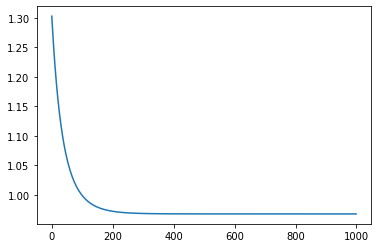

In [20]:
plt.plot(loss_tape)

[0.         1.18912725 2.26896111 3.34368662 4.38522903 5.36335257
 6.20580267 6.96929803 7.65360409 8.24930898 8.74406176]


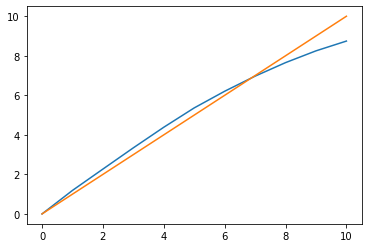

In [23]:
plt.plot(f)
plt.plot(np.arange(len(f)))
print(f)